# Evaluation Project 4 Global Power Plant Database

### Problem Statement:
###### Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available. </em></b>

Key attributes of the database 
The database includes the following indicators: 
 
- country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification 
- country_long (text): longer form of the country designation 
- name (text): name or title of the power plant, generally in Romanized form 
- gppd_idnr (text): 10 or 12 character identifier for the power plant 
- capacity_mw (number): electrical generating capacity in megawatts 
- latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326) 
- longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326) 
- primary_fuel (text): energy source used in primary electricity generation or export 
- other_fuel1 (text): energy source used in electricity generation or export 
- other_fuel2 (text): energy source used in electricity generation or export 
- other_fuel3 (text): energy source used in electricity generation or export 
- commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available 
- owner (text): majority shareholder of the power plant, generally in Romanized form 
- source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form 
- url (text): web document corresponding to the source field 
- geolocation_source (text): attribution for geolocation information 
- wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database. 
- year_of_capacity_data (number): year the capacity information was reported 
- generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013 
- generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014 
- generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015 
- generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016 
- generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017 
- generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018 
- generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019 
- generation_data_source (text): attribution for the reported generation information 
- estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013 
- estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014 
- estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015 
- estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016  
- estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017
- estimated_generation_note_2013 (text): label of the model/method used to estimate generation for the year 2013 
- estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014 
- estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015 
- estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016 
- estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017 
#### Fuel Type Aggregation 
  We define the "Fuel Type" attribute of our database based on common fuel categories. 

### Prediction : Make two prediction 1) Primary Fuel 2) capacity_mw 
     

In [40]:
# importing necessary libraries
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

import warnings 
warnings.filterwarnings('ignore')

In [41]:
# Importing CSV File
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [42]:
# checking head and no. of rows and columns
print("Rows: ",df.shape[0]," Columns:",df.shape[1])
pd.set_option('display.max_columns',None)
df.head()

Rows:  907  Columns: 27


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [43]:
# checking info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

* Dataset has 907 rows and 27 columns
* Some of feature are with object datatypes and other with float.
* 'other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019'and 'estimated_generation_gwh' are empty columns
* owner - More than 60 % data missing,year_of_capacity_data - Missing data with single unique value,country - non relevalent info,country_long - non relevalent info,gppd_idnr -non relevalent info,url - No missing value but of no use
removing these columns from dataset

In [44]:
# droping unnecessary columns
df.drop(columns=["country","country_long",'url','year_of_capacity_data',
                 'gppd_idnr','owner','other_fuel3','other_fuel2',
                 'estimated_generation_gwh','wepp_id','generation_gwh_2019','generation_gwh_2013'],axis=1,inplace=True)

In [45]:
# checking ' ','NA','-','?'
df.isin([' ','NA','-','?']).sum().any().sum()

0

In [46]:
# checking duplicate rows
df.duplicated().sum() 

0

* there is no duplicate row and no column contain ' ','NA','-','?'

In [47]:
# checking null values
df.isna().sum()

name                        0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
source                      0
geolocation_source         19
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

* longitude and latitude has 46, 46 null values respectively.        
* lets check distribution in these columns then i'll decide whether i delete rows containing null values or update them

Text(0.5, 0, 'longitude')

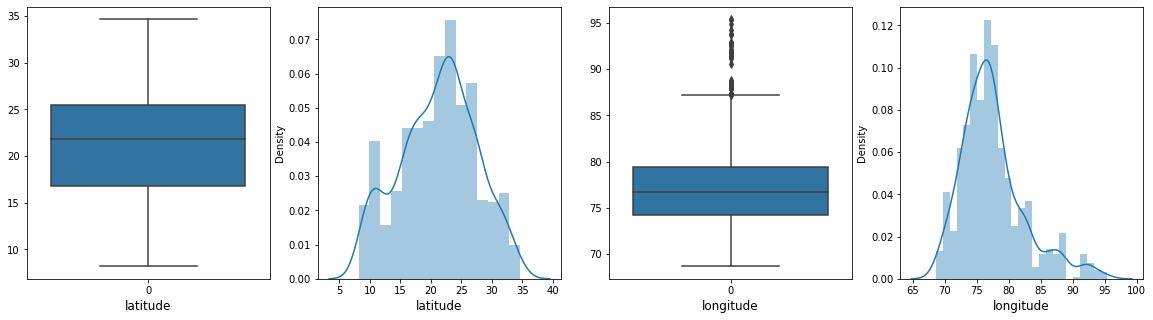

In [48]:
# checking distrbution un longitude and latitude
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.boxplot(data=df['latitude'])
plt.xlabel('latitude',fontsize=12)
plt.subplot(1,4,2)
sns.distplot(df['latitude'])
plt.xlabel('latitude',fontsize=12)
plt.subplot(1,4,3)
sns.boxplot(data=df['longitude'])
plt.xlabel('longitude',fontsize=12)
plt.subplot(1,4,4)
sns.distplot(df['longitude'])
plt.xlabel('longitude',fontsize=12)

- there are outliers in longitude so i'll use median for longitude to fill null values
- for latitude i'll use mean

In [49]:
# filling null values in longitude and latitude
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())

- other_fuel1 has 709 null values that is around 80% of data but this columns is important as power plants sometime use 2 types of fuel
- commissioning_year has 380 which is around 40% of data but this column is not important as it will no effect fuel type so i'll drop this column

In [50]:
# filling null values in other_fuel
df['other_fuel1'] = df['other_fuel1'].fillna('none')

In [51]:
# droping 'commissioning_year'
df = df.drop(columns = ['commissioning_year'])

- geolocation_source has object data and has 19 null values here i'll use mode method here as it has object data and most occurring geolocation_source should fit these null values

In [52]:
# filling null values of geolocation_source
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

In [53]:
df.isna().sum()

name                        0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1                 0
source                      0
geolocation_source          0
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

- lets analyse generation_data_source to fill null values

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

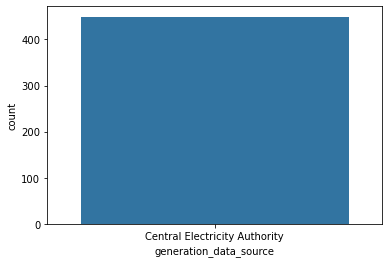

In [54]:
sns.countplot(df['generation_data_source'])
df['generation_data_source'].value_counts()

- this columns have only one value in all not empty rows and which is of object datatype now i'll fill these value with none but  i think it will not affect target column i'll check the correlation later 

In [55]:
# filling null values in 'generation_data_source'
df['generation_data_source'] = df['generation_data_source'].fillna('none')

In [56]:
df.isna().sum()

name                        0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1                 0
source                      0
geolocation_source          0
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source      0
dtype: int64

- remaining columns contain numerical data and i don't want to change the data so i'll fill the null values with zero because around 50% data is null in each remaining column

In [57]:
df = df.fillna(0)

In [58]:
df.isna().sum().sum()

0

- All null values are removed

In [59]:
# checking stats of numerical data
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1067.106713,1129.781446,1180.909147,1235.958207,1284.630911
std,590.085456,6.079148,4.815073,2926.078576,3105.552487,3131.100641,3187.208175,3298.251107
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.200000,21.281800,76.719500,0.000000,0.000000,0.000000,0.000000,0.000000
75%,385.250000,25.176450,79.206100,556.562750,598.926350,670.039394,709.290725,687.754000
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


- capcity_nw has max value 4760 and min 0 and it looks like it has some outliers 
- there is not much deviation in quantile range of latitude and longitude data distrbution looks good here
- in remaining coumns we have only 50% data as we know 

In [60]:
# checking stats of object columns
df.describe(include=['O'])

,name,primary_fuel,other_fuel1,source,geolocation_source,generation_data_source
count,907,907,907,907,907,907
unique,907,8,4,191,3,2
top,ACME Solar Tower,Coal,none,Central Electricity Authority,WRI,none
freq,1,258,709,519,784,458


- power plants has maximum 7 varieties of fuel and it is showing 8 because one is 'none' which is filled by in place of NaN 
- and geolocation_source has only 3 unique values

In [61]:
# converting object data into numerical by using label encoder
from sklearn.preprocessing import LabelEncoder
labenc = LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i] = labenc.fit_transform(df[i])

<AxesSubplot:>

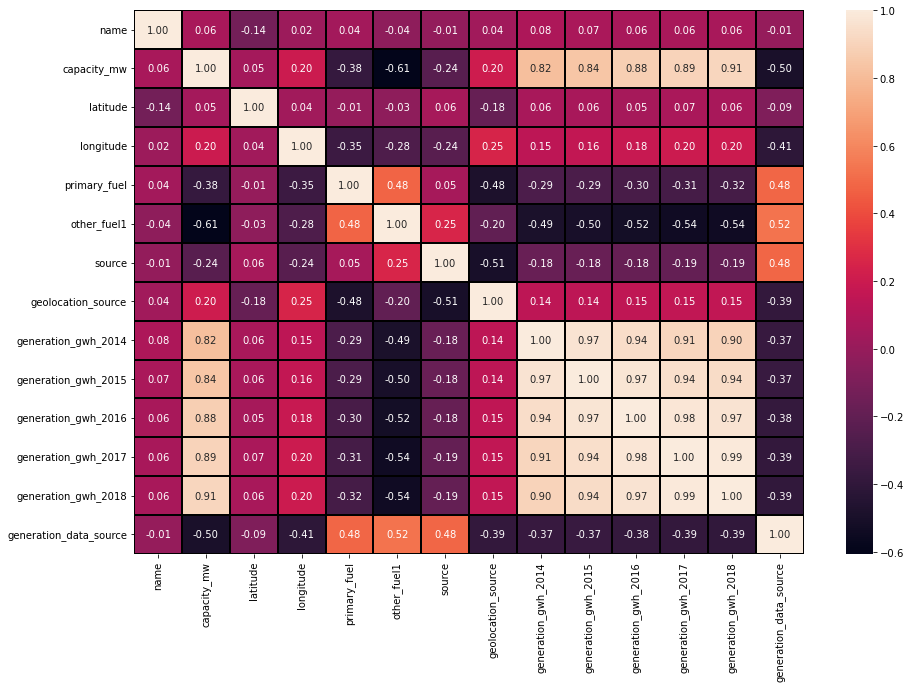

In [62]:
# checking correlation of features with target and other features
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linecolor='black',linewidths=0.1,fmt='0.2f')

- 'name', 'source', 'latitude' are very less correlated with target columnn so we can drop them
- 'capacity_mw' is highly and posotively correlated with multiple columns and negatively with target column so i'll keep this column and drop other columns as it has -0.38 corr value which is more than others
- other fuel1 is correlated with primary fuel and more with generation source data and  generation source data is equally correlated with target columns as other fuel1 

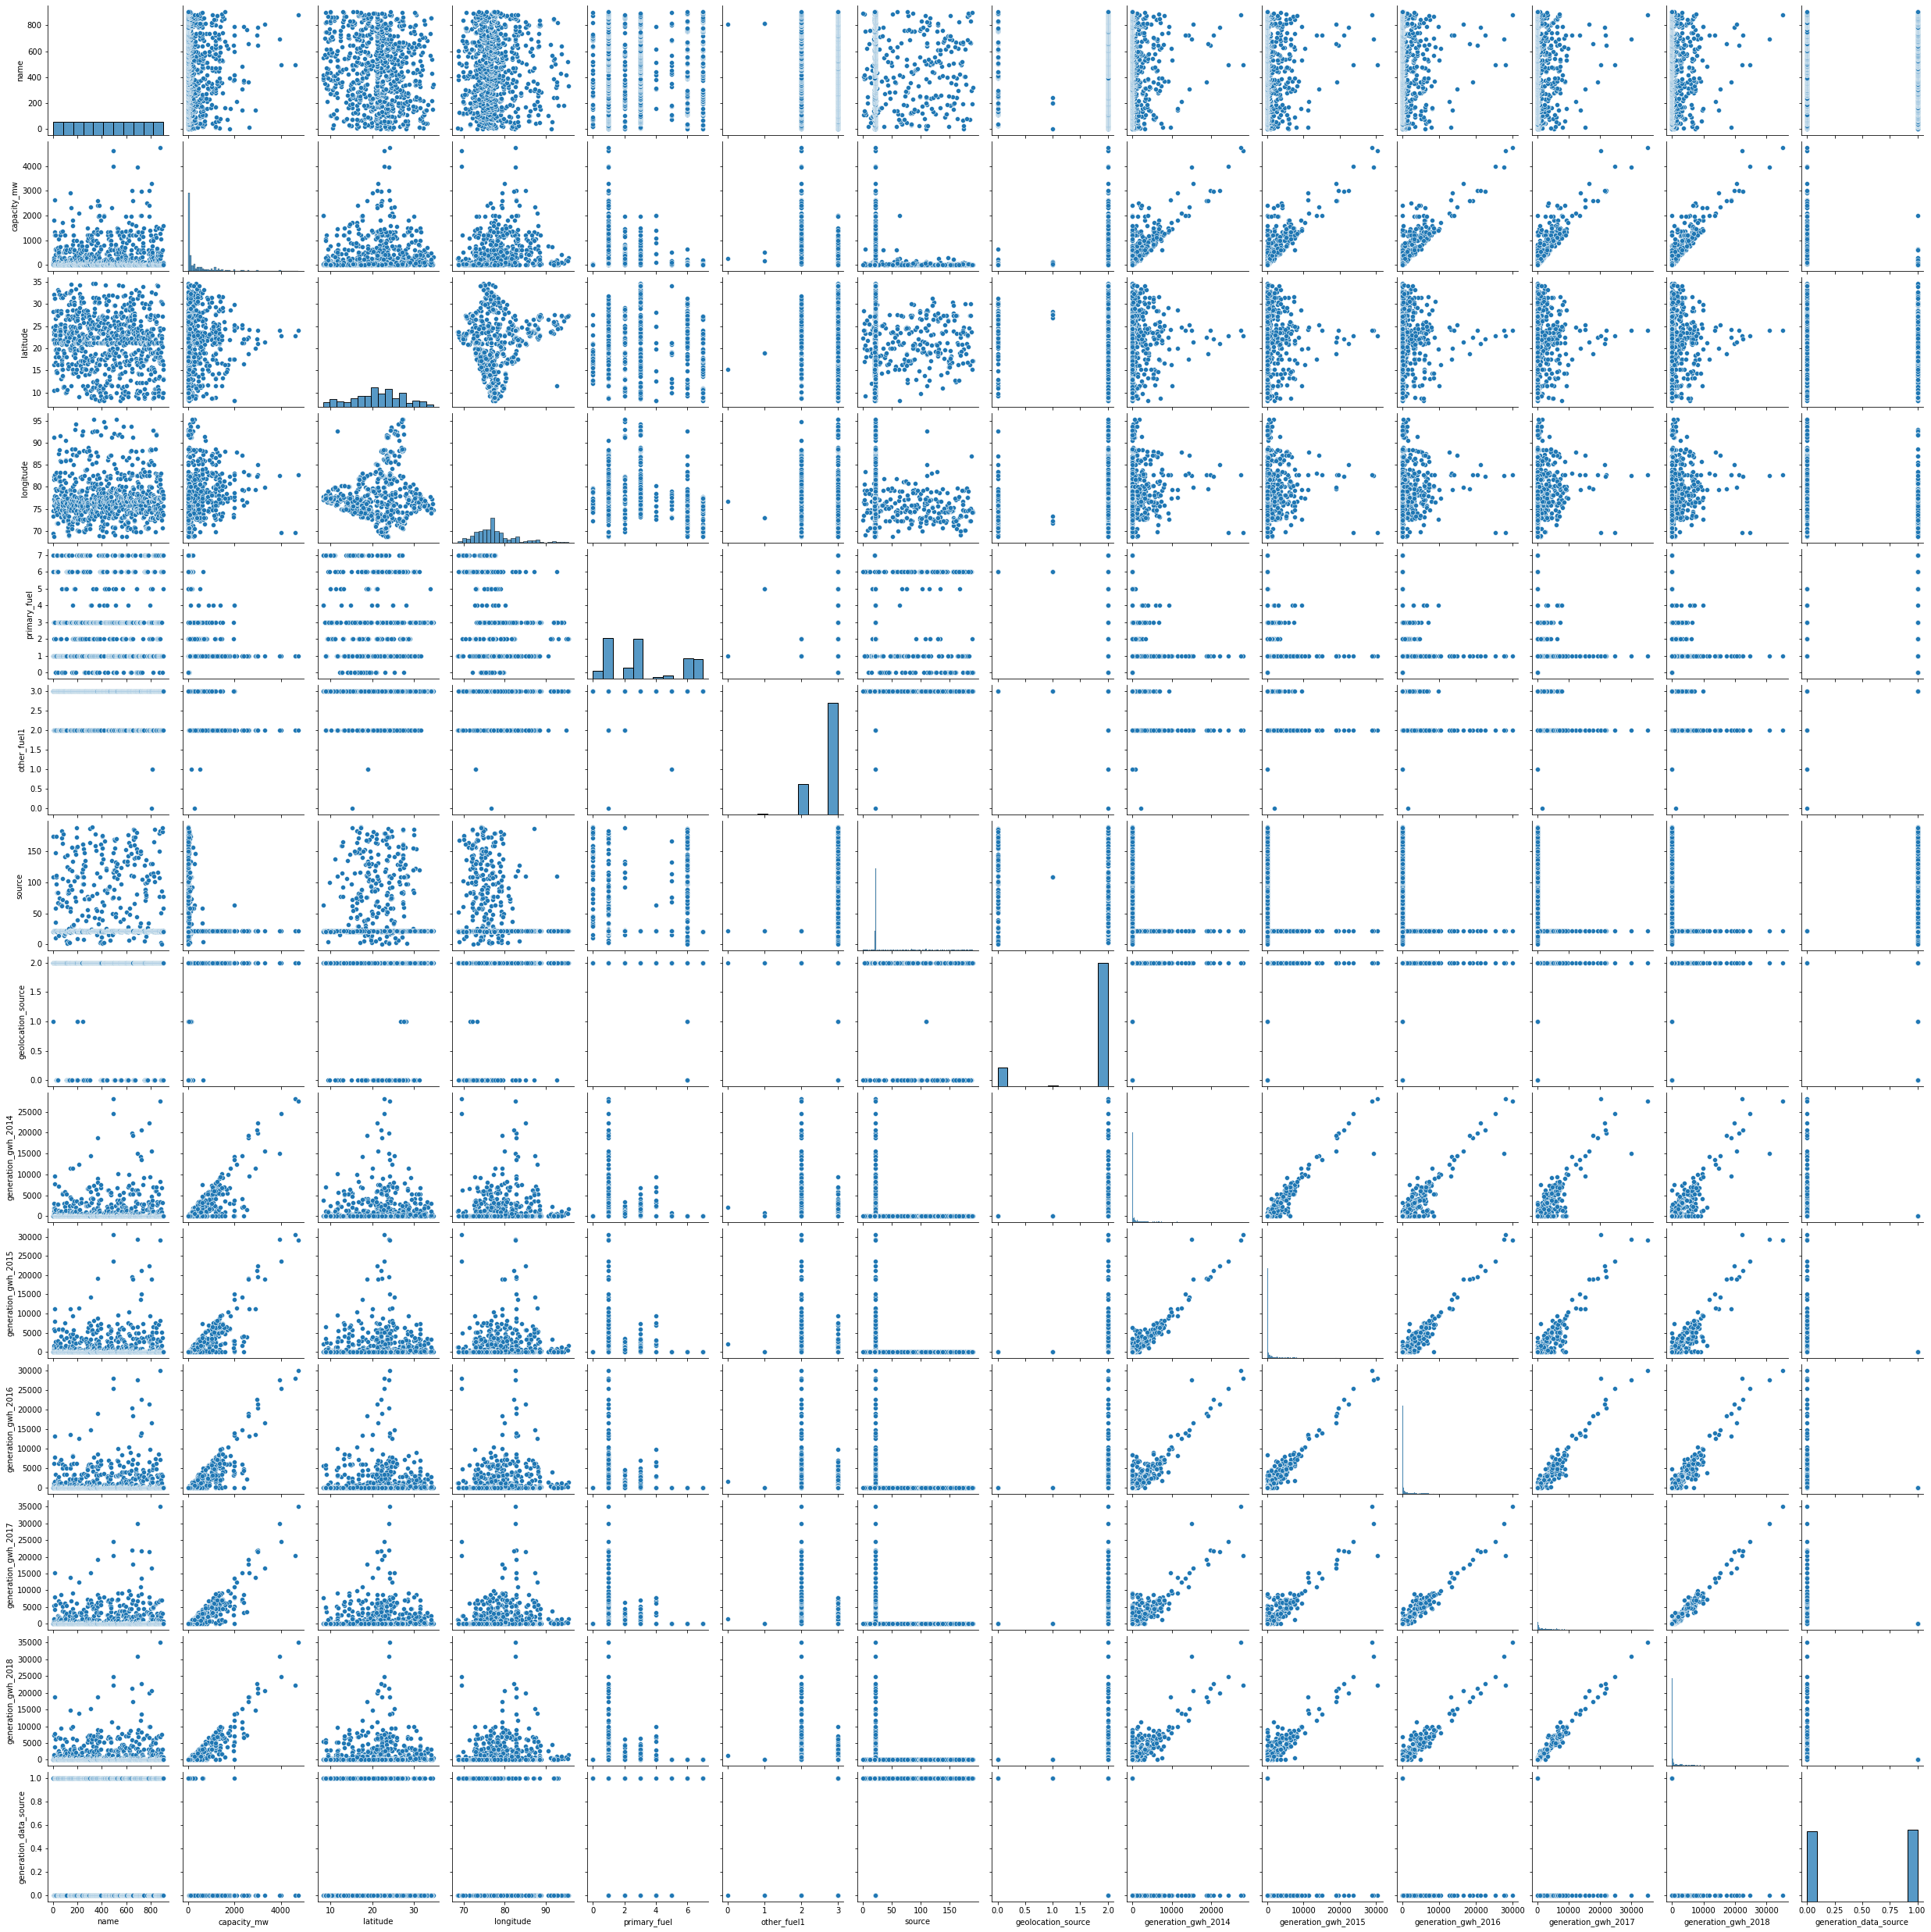

In [63]:
sns.pairplot(df)

- same conclusion as we get from heatmap

In [67]:
# droping columns to remove multicolinearity
df = df.drop(columns=['name','source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016'])

In [75]:
# deviding columns into categorical and continous columns
df_con = df.drop(columns=['primary_fuel', 'other_fuel1',
       'geolocation_source','generation_data_source'])
df_cat = df.drop(columns = ['capacity_mw', 'latitude', 'longitude','generation_gwh_2017', 'generation_gwh_2018'])

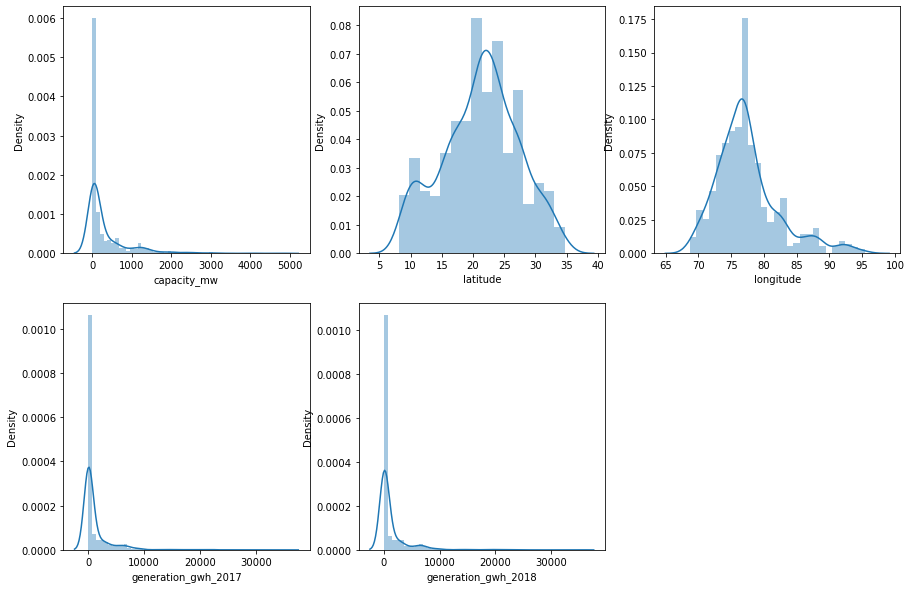

In [76]:
# checking skewness
# checking distribution in continous columns
plt.figure(figsize=(15,10))
plot = 1
for column in df_con:
    if plot<=5:
        ax = plt.subplot(2,3,plot)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plot+=1
plt.show()

- as i can see data skewed in capacity_mw , longitute, generation_gwh_2017 and generation_gwh_2018 rest columns are categorical

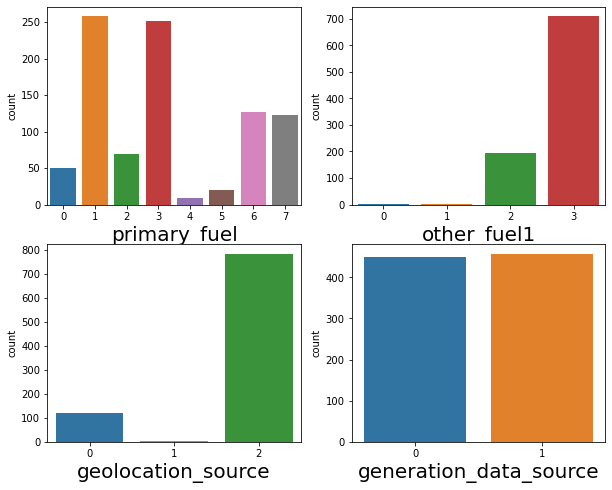

In [78]:
# checking data distribution in categorical columns
plt.figure(figsize=(10,8))
plot = 1
for column in df_cat:
    if plot<=4:
        ax = plt.subplot(2,2,plot)
        sns.countplot(x=column,data=df_cat)
        plt.xlabel(column,fontsize=20)
    plot+=1
plt.show()

- data is imbalanced in other_fuel1 and in geolocation_source

In [89]:
# removing skewness from continous columns
# removing skewness using 'yeo-johnson'
from sklearn.preprocessing import PowerTransformer
skewed = ['capacity_mw' , 'longitude', 'generation_gwh_2017','generation_gwh_2018']
scaler = PowerTransformer(method='yeo-johnson')
df[skewed] = scaler.fit_transform(df[skewed].values)

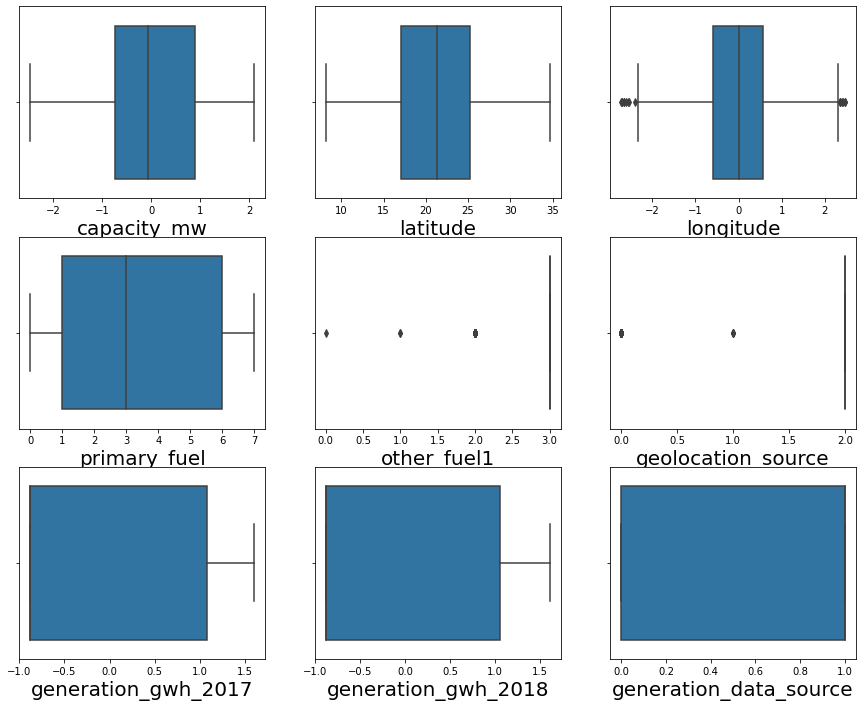

In [92]:
# checking outliers
plt.figure(figsize=(15,12))
plot = 1
for column in df:
    if plot<=9:
        ax = plt.subplot(3,3,plot)
        sns.boxplot(x=column,data=df)
        plt.xlabel(column,fontsize=20)
    plot+=1
plt.show()

- three columns have outliers lets remove them remove outliers

In [97]:
df['other_fuel1'].value_counts(),df['geolocation_source'].value_counts()

(3    709
 2    195
 1      2
 0      1
 Name: other_fuel1, dtype: int64,
 2    784
 0    119
 1      4
 Name: geolocation_source, dtype: int64)

- i'll not dop outliers from other_fuel1 and 'geolocation_source' as the are coteforical columns

In [107]:
# removing outliers from longitude
min_a, max_a = df.longitude.quantile([0.00, 0.999])
min_a, max_a

(-2.157316272867002, 2.1873985295675067)

<AxesSubplot:xlabel='longitude'>

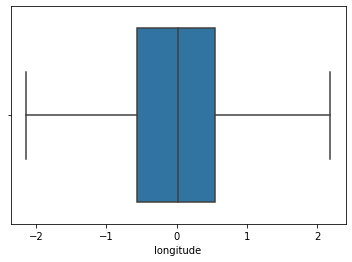

In [108]:
# removing rows containing ouotliers
df = df[(df.longitude<max_a)&(df.longitude>min_a)]
sns.boxplot(x=df['longitude'])

- outliers are removed

In [112]:
# scaling separating feature and label the data 
x = df.drop(columns=['primary_fuel'])
y = df.primary_fuel

# scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

##### Model Building (classification for primary_fuel)

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [116]:
# finding best random state
 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(x_train,y_train)
    y_pred=log_reg.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7969348659003831 on Random_state 591


##### Logistic Regression

In [118]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, random_state=591, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7969348659003831


Confusion matrix of Logistics Regression : 
 [[ 0  0  0  3  0  0  0 11]
 [ 0 80  0  2  0  0  0  5]
 [ 0  0  5  5  0  0  0  1]
 [ 0  1  2 64  0  0  0 10]
 [ 0  0  1  0  0  0  0  0]
 [ 0  1  1  0  0  0  0  2]
 [ 0  0  0  0  0  0 35  0]
 [ 0  4  0  4  0  0  0 24]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.93      0.92      0.92        87
           2       0.56      0.45      0.50        11
           3       0.82      0.83      0.83        77
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         4
           6       1.00      1.00      1.00        35
           7       0.45      0.75      0.56        32

    accuracy                           0.80       261
   macro avg       0.47      0.49      0.48       

- accuracy is 80%

##### Decision Tree Classifier

In [119]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, random_state=591, test_size=.3)
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
print('\033[1m'+'DecisionTreeClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of DecisionTreeClassifier :'+'\033[0m', accuracy_score(y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of DecisionTreeClassifier :'+'\033[0m \n',confusion_matrix(y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of DecisionTreeClassifier'+'\033[0m \n',classification_report(y_test, y_pred))

DecisionTreeClassifier Evaluation


Accuracy Score of DecisionTreeClassifier : 0.8505747126436781


Confusion matrix of DecisionTreeClassifier : 
 [[ 9  0  1  2  0  0  0  2]
 [ 4 79  0  2  0  2  0  0]
 [ 0  0 11  0  0  0  0  0]
 [ 2  0  0 67  1  0  0  7]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  1  0  0  3  0  0]
 [ 0  0  0  0  0  0 35  0]
 [ 0  6  0  6  0  2  0 18]]


classification Report of DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.60      0.64      0.62        14
           1       0.93      0.91      0.92        87
           2       0.85      1.00      0.92        11
           3       0.86      0.87      0.86        77
           4       0.00      0.00      0.00         1
           5       0.43      0.75      0.55         4
           6       1.00      1.00      1.00        35
           7       0.67      0.56      0.61        32

    accuracy                           0.85       261
   macro avg       0.67      0.72      0.6

- here accuracy is 85%

##### Random Forest Classifier

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=591, test_size=.3)
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print('\033[1m'+'RandomForestClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of RandomForestClassifier :'+'\033[0m', accuracy_score(y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of RandomForestClassifier :'+'\033[0m \n',confusion_matrix(y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of RandomForestClassifier'+'\033[0m \n',classification_report(y_test, y_pred))

RandomForestClassifier Evaluation


Accuracy Score of RandomForestClassifier : 0.8659003831417624


Confusion matrix of RandomForestClassifier : 
 [[ 9  2  0  1  0  0  0  2]
 [ 3 79  2  2  0  0  0  1]
 [ 0  0  9  2  0  0  0  0]
 [ 2  1  1 68  1  0  0  4]
 [ 0  0  1  0  0  0  0  0]
 [ 0  0  1  0  0  3  0  0]
 [ 0  0  0  0  0  0 35  0]
 [ 3  2  0  4  0  0  0 23]]


classification Report of RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.53      0.64      0.58        14
           1       0.94      0.91      0.92        87
           2       0.64      0.82      0.72        11
           3       0.88      0.88      0.88        77
           4       0.00      0.00      0.00         1
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00        35
           7       0.77      0.72      0.74        32

    accuracy                           0.87       261
   macro avg       0.72      0.72      0.7

- here accuracy is 86%

##### ExtraTreesClassifier

In [124]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=591, test_size=.3)
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
y_pred=etc.predict(x_test)
print('\033[1m'+'ExtraTreesClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of ExtraTreesClassifier :'+'\033[0m', accuracy_score(y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of ExtraTreesClassifier :'+'\033[0m \n',confusion_matrix(y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of ExtraTreesClassifier'+'\033[0m \n',classification_report(y_test, y_pred))

ExtraTreesClassifier Evaluation


Accuracy Score of ExtraTreesClassifier : 0.8697318007662835


Confusion matrix of ExtraTreesClassifier : 
 [[ 9  0  0  2  0  0  0  3]
 [ 3 80  2  1  0  0  0  1]
 [ 0  0  9  2  0  0  0  0]
 [ 2  1  1 66  1  0  0  6]
 [ 0  0  1  0  0  0  0  0]
 [ 0  0  1  0  0  3  0  0]
 [ 0  0  0  0  0  0 35  0]
 [ 3  1  0  3  0  0  0 25]]


classification Report of ExtraTreesClassifier 
               precision    recall  f1-score   support

           0       0.53      0.64      0.58        14
           1       0.98      0.92      0.95        87
           2       0.64      0.82      0.72        11
           3       0.89      0.86      0.87        77
           4       0.00      0.00      0.00         1
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00        35
           7       0.71      0.78      0.75        32

    accuracy                           0.87       261
   macro avg       0.72      0.72      0.72       

- accuracy is 87%

### cross validation

In [126]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
       DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, x_scaled, y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.72988506 0.74137931 0.73988439 0.7283237  0.76300578]
Mean Score : 0.7404956481296924
Std deviation : 0.0123983991995996




Cross Validation Score DecisionTreeClassifier() :

Score : [0.79310345 0.77586207 0.75722543 0.79190751 0.83815029]
Mean Score : 0.7912497508471198
Std deviation : 0.026825227867173774




Cross Validation Score RandomForestClassifier() :

Score : [0.82183908 0.82758621 0.80924855 0.80924855 0.86127168]
Mean Score : 0.825838814696698
Std deviation : 0.019105037944309265




Cross Validation Score ExtraTreesClassifier() :

Score : [0.81034483 0.84482759 0.80346821 0.80924855 0.87861272]
Mean Score : 0.829300378712378
Std deviation : 0.028640846536716853




- We can see that RandomForestClassifier() gives us good Accuracy and maximum f1 score along with best Cross-validation score. we will apply Hyperparameter tuning on Random Forest model and Used it as final model.

##### Hyper parameter tuning

In [130]:
from sklearn.model_selection import GridSearchCV
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=5)
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.648 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.719 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.711 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.669 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.760 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=0.721 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=0.752 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, ma

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=5)

In [131]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'log2',
 'n_estimators': 60}

### Final model

In [153]:
# tuning final model

Final_mod = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators=60, max_depth=42 ,max_features='log2')
Final_mod.fit(x_train,y_train)
y_pred=Final_mod.predict(x_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(y_test, y_pred))

Accuracy Score :
 0.8697318007662835


accuracy 87%  which is increased by 0.4 percent 

In [154]:
# saveing the model
import pickle
filename = 'primary_fuel'
pickle.dump(Final_mod, open(filename,'wb'))

# working on capacity_mw (regression)

In [155]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,geolocation_source,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,-1.695767,28.1839,-0.944854,6,3,1,-0.878131,-0.883788,1
1,0.193694,24.7663,-0.534212,1,3,2,-0.878131,-0.883788,1
3,0.360998,23.8712,2.167755,2,3,2,1.069326,1.038383,0
4,1.649503,21.9603,1.126913,1,2,2,1.390376,1.420200,0
6,-0.065377,10.4547,0.085917,3,3,2,0.655938,0.476682,0
...,...,...,...,...,...,...,...,...,...
902,1.593509,16.2949,0.166816,1,2,2,1.115671,1.055150,0
903,-1.615576,12.8932,0.346098,6,3,0,-0.878131,-0.883788,1
904,-0.522773,15.2758,-0.268685,7,3,2,-0.878131,-0.883788,1
905,0.086915,24.3500,-0.787375,1,3,2,-0.878131,-0.883788,1


- cleaing part is done now i'll select the best feature for target variable 

<AxesSubplot:>

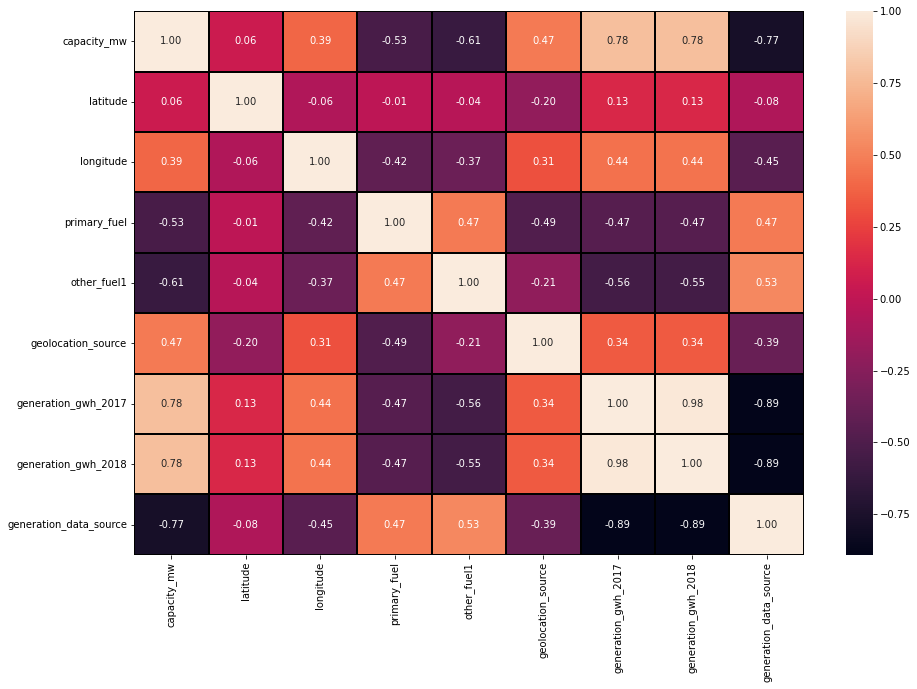

In [156]:
# checking correlation of features with target and other features
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linecolor='black',linewidths=0.1,fmt='0.2f')

- latitude very very less correlated with target column so i am droping this column
- there is multicolinearity in generation_gwh_2017 and generation_gwh_2018 so i am droping generation_gwh_2017

In [157]:
# droping unnecessary columns
df = df.drop(columns = ['latitude','generation_gwh_2018'])

In [160]:
# separating feature and label and scaling the data
x = df.drop(columns=['capacity_mw'])
y = df.capacity_mw

In [161]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#### model building

In [162]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [163]:
# checking best random state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,1000):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(x_train,y_train)
    y_pred=lin_reg.predict(x_test)
    R2=r2_score(y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.7868763412705628 on Random_state 434


###  applying different model

In [166]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor()
rd=Ridge(alpha=0.01)
xgb=XGBRegressor()
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    y_pred = m.predict(x_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
    print('Mean squared error :', mean_squared_error(y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(y_test,y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.34566422263243013
Mean squared error : 0.2459250997766373
Root Mean Squared Error: 0.49590835824438095


 R2 Score :
0.7647828770992456


 Error of  Ridge(alpha=0.01) :
Mean absolute error : 0.4346092360400767
Mean squared error : 0.30387816170361137
Root Mean Squared Error: 0.5512514505229091


 R2 Score :
0.709353185286035


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.3863811586545193
Mean squared error : 0.31671548190799015
Root Mean Squared Error: 0.5627748056798475


 R2 Score :
0.6970748227806534


 Error of  AdaBoostRegressor(learning_rate=0.1) :
Mean absolute error : 0.3618737673950685
Mean squared error : 0.24023296407693767
Root Mean Squared Error: 0.49013565885062643


 R2 Score :
0.7702271679978163


 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.3384656363551941
Mean squared error : 0.22095910712154498
Root Mean Squared Error: 0.4700628757108404


 R2 Score :
0.788661810026489

- GradientBoostingRegressor is giving best accuracy which is 78% with minimum error nearly equal to 0

##### cross validation

In [168]:
# Cross Validation
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, x_scaled, y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.7637853330847125


Cross Validation Score : Ridge(alpha=0.01) :

Mean CV Score : 0.7098742565834943


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.6810067949805927


Cross Validation Score : AdaBoostRegressor(learning_rate=0.1) :

Mean CV Score : 0.7639184878040026


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.7958614372830392


Cross Validation Score : XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=n

* we can say that models is not overfitting on the basis of cross val score

##### Hyper parameter tuning

In [169]:
# tuning only GradientBoostingRegressor as it is giving best accuracy
from sklearn.model_selection import GridSearchCV

In [170]:
parameter = {'n_estimators':[50,60,80],'max_depth': [10,20,40],
            'criterion':['mse','mae'],'min_samples_leaf': [5,10,15],
             'min_samples_split':[5,10,15,20],
             'max_features':["auto","sqrt","log2"]}

In [171]:
GCV = GridSearchCV(GradientBoostingRegressor(),parameter,verbose = 5, n_jobs=-1)

In [173]:
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [5, 10, 15, 20],
                         'n_estimators': [50, 60, 80]},
             verbose=5)

In [174]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 10,
 'min_samples_split': 15,
 'n_estimators': 50}

In [197]:
# final model training
from sklearn.ensemble import RandomForestRegressor
F_mod =  RandomForestRegressor(n_estimators=50 ,criterion = 'mse', max_depth= 40, max_features = 'sqrt',
             min_samples_leaf = 10, min_samples_split = 15)
F_mod.fit(x_train,y_train)
y_pred=Final_mod.predict(x_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.35685197527601326
Mean squared error : 0.2364022917505956
Root Mean Squared Error: 0.48621218799058874


 R2 Score of Final Model :
0.7738910466510978




- accuracy is decreased by 1 percentage because i did not provide wide range of parameters 

In [198]:
# saveing the model
import pickle
filename = 'capacity_mw '
pickle.dump(F_mod, open(filename,'wb'))